# World Happiness Report

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt        
import plotly.plotly as py 
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
%matplotlib inline
init_notebook_mode(connected=True)

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


### Problem Definition

The objective of this analysis is to find the factors that contributed the most to happiness in 2015. <br>
. Objectives <br>
. Deliverables <br>
. Roles and responsibilities <br>
. Current situation <br>
. Timeline <br>
. Costs and benefits <br>

### Data Preparation

Prepare and become familiar with the data: <br>
. Pull together data table <br>
. Categorize the data <br>
. Clean the data <br>
. Remove unnecessary data <br>
. Transform the data <br>
. Partition the data <br>

#### Data overview

In [2]:
df_2015 = pd.read_csv(r'2015.csv')

In [3]:
df_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
Country                          158 non-null object
Region                           158 non-null object
Happiness Rank                   158 non-null int64
Happiness Score                  158 non-null float64
Standard Error                   158 non-null float64
Economy (GDP per Capita)         158 non-null float64
Family                           158 non-null float64
Health (Life Expectancy)         158 non-null float64
Freedom                          158 non-null float64
Trust (Government Corruption)    158 non-null float64
Generosity                       158 non-null float64
Dystopia Residual                158 non-null float64
dtypes: float64(9), int64(1), object(2)
memory usage: 14.9+ KB


There are 158 records in this table and 12 features. All these features are not null. The features are: <br>
Country - Name of the country - object type <br>
Region - Region the country belongs to - object type <br>
Happiness Rank - Rank of the country based on the Happiness Score. - integer <br>
Happiness Score - A metric measured in 2015 by asking the sampled people the question: "How would you rate your happiness on a scale of 0 to 10 where 10 is the happiest." - float type from 0.0 to 10.0 <br>
Standard Error - The standard error of the happiness score. - float type <br>
Economy (GDP per Capita) - The extent to which GDP contributes to the calculation of the Happiness Score. - float type <br>
Family - The extent to which Family contributes to the calculation of the Happiness Score - float type <br>
Health (Life Expectancy) - The extent to which Life expectancy contributed to the calculation of the Happiness Score - float type <br>
Freedom - The extent to which Freedom contributed to the calculation of the Happiness Score. - float type <br>
Trust (Government Corruption) - The extent to which Perception of Corruption contributes to Happiness Score. - float type <br>
Generosity - The extent to which Generosity contributed to the calculation of the Happiness Score. - float type <br>
Dystopia Residual - The extent to which Dystopia Residual contributed to the calculation of the Happiness Score. - float type <br>

What is Dystopia?

Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as “Dystopia,” in contrast to Utopia.

In [4]:
df_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


As can be seen the 5 happiest countries are Switzerland, Iceland, Denmark, Norway and Canada, 4 of them from Western Europe

In [5]:
df_2015.tail()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


The 5 unhappiest countries are Rwanda, Benin, Syria, Burundi and Togo, 4 of them are from Sub-Saharan Africa.

In [6]:
df_2015.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


The happiness score mean is 5.37, with a low standard deviation 1.14

#### Continent analysis

In [7]:
world_map = dict(type = 'choropleth', 
           locations = df_2015['Country'],
           locationmode = 'country names',
           z = df_2015['Happiness Rank'], 
           text = df_2015['Country'],
          colorscale = 'Viridis', reversescale = False)
layout = dict(title = 'Happiness Rank across the world', width = 800,
        height = 700, geo = dict(showframe = False, projection = {'type': 'mercator'}))
choromap6 = go.Figure(data = [world_map], layout=layout)
iplot(choromap6)

Darker colors represent higher rank. As can be seen, America, Europe and Oceania are the happiest continents

#### Region analysis

In [8]:
set(df_2015.Region) 

{'Australia and New Zealand',
 'Central and Eastern Europe',
 'Eastern Asia',
 'Latin America and Caribbean',
 'Middle East and Northern Africa',
 'North America',
 'Southeastern Asia',
 'Southern Asia',
 'Sub-Saharan Africa',
 'Western Europe'}

In [15]:
df_2015.groupby('Region')['Happiness Score'].mean().sort_values(ascending=False)

Region
Australia and New Zealand          7.285000
North America                      7.273000
Western Europe                     6.689619
Latin America and Caribbean        6.144682
Eastern Asia                       5.626167
Middle East and Northern Africa    5.406900
Central and Eastern Europe         5.332931
Southeastern Asia                  5.317444
Southern Asia                      4.580857
Sub-Saharan Africa                 4.202800
Name: Happiness Score, dtype: float64

Australia and New Zealand, North America and Western Europe are in average the regions with a highest score in happiness, as seen previously in the map.

Text(0,0.5,'Number of countries')

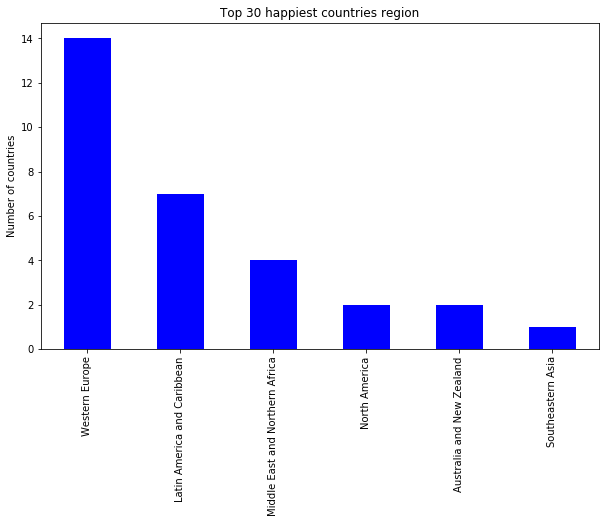

In [37]:
plt.figure(figsize=(10,6))
regions_list = df_2015.sort_values(by=['Happiness Rank'],ascending=True)['Region'].head(30).value_counts()
regions_list.plot(kind = 'bar', color = 'blue', title = 'Top 30 happiest countries region')
plt.ylabel('Number of countries')

#### Features related to happiness score

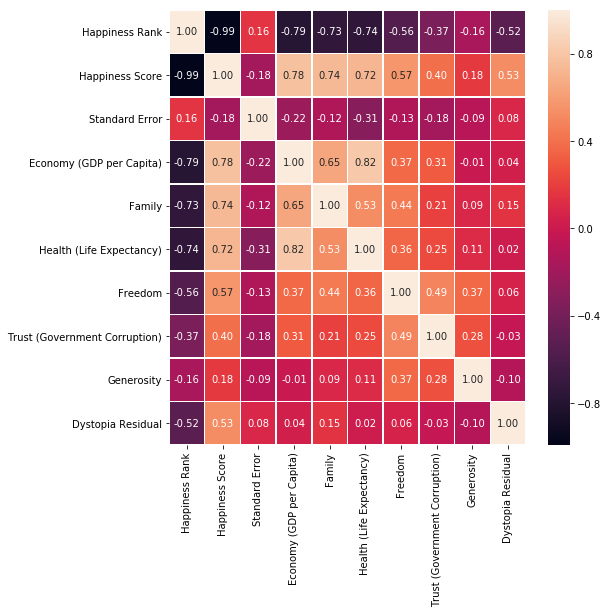

In [33]:
f,ax = plt.subplots(figsize=(8,8))
sns.heatmap(df_2015.corr(),annot=True,linewidths=.5,fmt=".2f",ax=ax)
plt.show()

The heatmap shows that: <br>
The closer the value is to 1.0, the positive correlation is higher, whereas the closer the value is to -1.0, the negative correlation is higher <br>
The factors that most contributed to the happines score are economy, family and health.

 


In [ ]:
#TODO
#fazer melhores análise e definir objectivos
#fazer mesma análise para outros anos e juntar variáveis - ver mshinde10
#Fazer gráficos para ver relação entre happiness score e economy, familiy, health - ver rabiulcste
#fazer gráfico de regressão - ver rabiulcste